In [34]:
import pandas as pd
import numpy as np
import datetime as dt

#### `Ambiguous dates`
You have a DataFrame containing a __subscription_date__ column that was collected from various sources with different Date formats such as __YYYY-mm-dd__ and __YYYY-dd-mm__. What is the best way to unify the formats for ambiguous values such as __2019-04-07__?


- Set them to NA and drop them.

- Infer the format of the data in question by checking the format of subsequent and previous values.

- Infer the format from the original data source.

- `All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it.` Like most cleaning data tasks, ambiguous dates require a thorough understanding of where your data comes from. Diagnosing problems is the first step in finding the best solution!

In [35]:
banking  = pd.read_csv('../datasets/banking_dirty.csv')
banking = banking.iloc[:, 1:]
print(banking.head(2))

    cust_id  birth_date  Age  acct_amount  inv_amount   fund_A  fund_B  \
0  870A9281  1962-06-09   58     63523.31       51295  30105.0  4138.0   
1  166B05B0  1962-12-16   58     38175.46       15050   4995.0   938.0   

   fund_C   fund_D account_opened last_transaction  
0  1420.0  15632.0       02-09-18         22-02-19  
1  6696.0   2421.0       28-02-19         31-10-18  


In [36]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           100 non-null    object 
 1   birth_date        100 non-null    object 
 2   Age               100 non-null    int64  
 3   acct_amount       100 non-null    float64
 4   inv_amount        100 non-null    int64  
 5   fund_A            100 non-null    float64
 6   fund_B            100 non-null    float64
 7   fund_C            100 non-null    float64
 8   fund_D            100 non-null    float64
 9   account_opened    100 non-null    object 
 10  last_transaction  100 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


In [37]:
# asus = banking.iloc[0:]

# asus = asus.values.tolist()
# asus
# # asus.tolist()
alll = banking.columns.tolist()
alll

['cust_id',
 'birth_date',
 'Age',
 'acct_amount',
 'inv_amount',
 'fund_A',
 'fund_B',
 'fund_C',
 'fund_D',
 'account_opened',
 'last_transaction']

In [38]:
banking_selected_columns = banking[['cust_id','acct_amount', 'inv_amount', 'account_opened', 'last_transaction']]
banking = banking_selected_columns
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           100 non-null    object 
 1   acct_amount       100 non-null    float64
 2   inv_amount        100 non-null    int64  
 3   account_opened    100 non-null    object 
 4   last_transaction  100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


### `~Hell Yeah`

In [39]:
acct_cur = np.load('./datas/acct_cur.npy')
acct_cur = acct_cur.tolist()

In [40]:
banking = banking.loc[:96]
banking['acct_cur'] = acct_cur
print(banking.info())
print()
print(banking.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           97 non-null     object 
 1   acct_amount       97 non-null     float64
 2   inv_amount        97 non-null     int64  
 3   account_opened    97 non-null     object 
 4   last_transaction  97 non-null     object 
 5   acct_cur          97 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ KB
None

    cust_id  acct_amount  inv_amount account_opened last_transaction acct_cur
0  870A9281     63523.31       51295       02-09-18         22-02-19   dollar
1  166B05B0     38175.46       15050       28-02-19         31-10-18   dollar
2  BFC13E88     59863.77       24567       25-04-18         02-04-18   dollar
3  F2158F66     84132.10       23712       07-11-17         08-11-18     euro
4  7A73F334    120512.00       93230       14-05-18         19-0

C:\Users\Albert\AppData\Local\Temp\ipykernel_5896\543795774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking['acct_cur'] = acct_cur


In [41]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

- __Cleaning phone numbers__: You saw how to standardize phone number formats by replacing certain characters and ensuring all numbers meet a minimum length requirement. For example, replacing ___"+" with "00___" and removing dashes was achieved using:

  - df['phone_number'] = df['phone_number'].str.replace("+", "00").str.replace("-", "")

- __Handling missing values__: You learned to identify and replace phone numbers that do not meet a minimum digit count with NaN, ensuring data integrity. This involved using string methods to calculate length and conditional replacement.
- __Regular expressions (regex)__: The lesson introduced regex as a powerful tool for pattern matching and text manipulation, allowing for dynamic and complex data cleaning tasks. You practiced extracting only digits from strings, highlighting regex's utility in cleaning and formatting text data.
- __Removing honorifics from names__: By replacing titles like ___"Dr.", "Mr.", "Miss", and "Ms."___ with an empty string, you prepared text data for further analysis, such as splitting full names into first and last names.
Filtering based on text length: Finally, you isolated survey responses with significant content by filtering out entries below a certain character count, ensuring the data's relevance and richness for analysis.

In [42]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format=True,
                                           # Return missing value for error
                                           errors='coerce')

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
92    2017
93    2018
94    2017
95    2018
96    2017
Name: acct_year, Length: 97, dtype: object


C:\Users\Albert\AppData\Local\Temp\ipykernel_5896\3991134186.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],
C:\Users\Albert\AppData\Local\Temp\ipykernel_5896\3991134186.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],
C:\Users\Albert\AppData\Local\Temp\ipykernel_5896\3991134186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Now that the __acct_year__ column is created, a simple __.groupby()__ will show you how accounts are opened on a yearly!

- The importance of unit uniformity in datasets for accurate analysis, illustrated by converting temperature data from Fahrenheit to Celsius using the formula (Fahrenheit - 32) * 5/9.
- Techniques for handling date inconsistencies, such as converting date formats to a uniform standard using pandas' to_datetime function with infer_datetime_format=True and errors='coerce' to handle unrecognizable formats.
- Addressing ambiguous dates by understanding the data's context or converting them to NA if the format cannot be confidently determined.
- Converting currency values to a uniform standard, as shown in the exercise where Euro values in a banking dataset were converted to dollars with the following code:

#### `Cross field or no cross field?`
Throughout this course, you've been immersed in a variety of data cleaning problems from range constraints, data type constraints, uniformity and more.

In this lesson, you were introduced to cross field validation as a means to sanity check your data and making sure you have strong data integrity.

Now, you will map different applicable concepts and techniques to their respective categories.

- Map different applicable concepts and techniques to their respective categories.
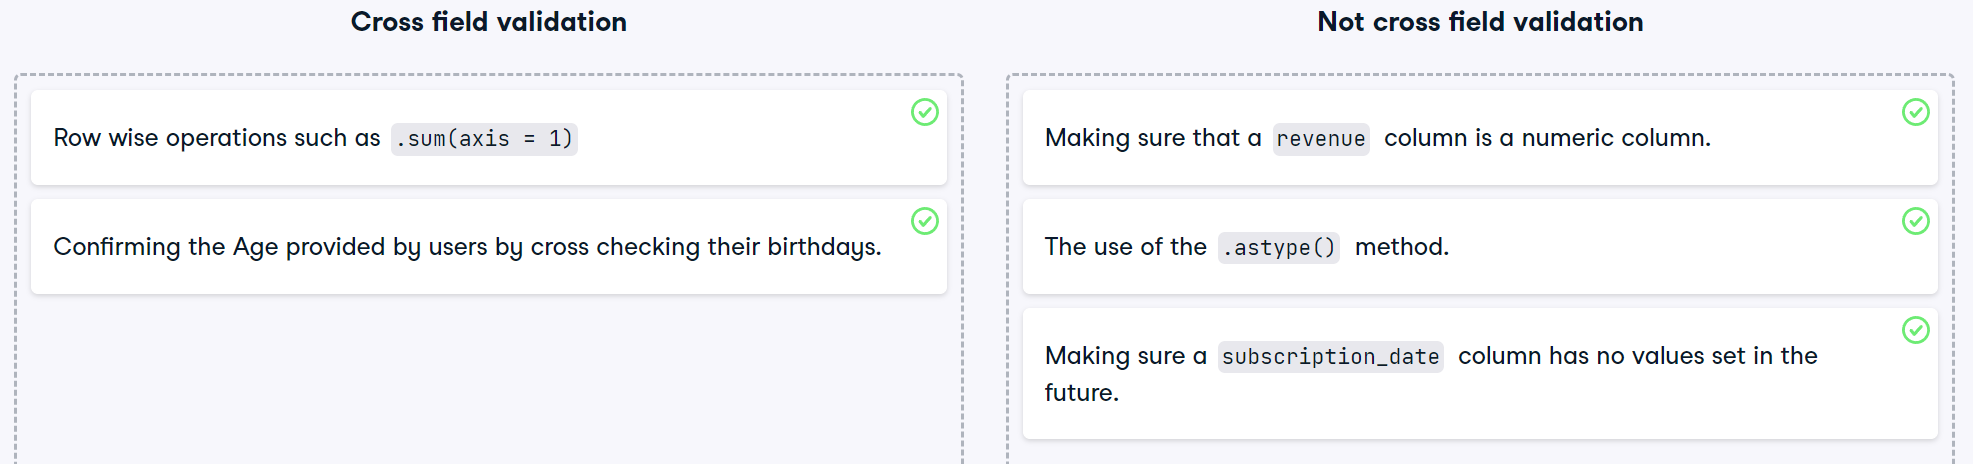

In [43]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           97 non-null     object        
 1   acct_amount       97 non-null     float64       
 2   inv_amount        97 non-null     int64         
 3   account_opened    97 non-null     datetime64[ns]
 4   last_transaction  97 non-null     object        
 5   acct_cur          97 non-null     object        
 6   acct_year         97 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.4+ KB


In [44]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           97 non-null     object        
 1   acct_amount       97 non-null     float64       
 2   inv_amount        97 non-null     int64         
 3   account_opened    97 non-null     datetime64[ns]
 4   last_transaction  97 non-null     object        
 5   acct_cur          97 non-null     object        
 6   acct_year         97 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.4+ KB


In [45]:
bank = pd.read_csv('../datasets/banking_dirty.csv')
bank = bank.iloc[:, 1:]
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           100 non-null    object 
 1   birth_date        100 non-null    object 
 2   Age               100 non-null    int64  
 3   acct_amount       100 non-null    float64
 4   inv_amount        100 non-null    int64  
 5   fund_A            100 non-null    float64
 6   fund_B            100 non-null    float64
 7   fund_C            100 non-null    float64
 8   fund_D            100 non-null    float64
 9   account_opened    100 non-null    object 
 10  last_transaction  100 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


#### `How's our data integrity?`
New data has been merged into the __banking__ DataFrame that contains details on how investments in the __inv_amount__ column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the __age__ and __birth_date__ columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of __inv_amount__ and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

- Find the rows where the sum of all rows of the __fund_columns__ in banking are equal to the __inv_amount__ column.
- Store the values of __banking__ with consistent __inv_amount__ in __consistent_inv__, and those with inconsistent ones in __inconsistent_inv__.

In [46]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = bank[fund_columns].sum(axis=1) == bank['inv_amount']

# Store consistent and inconsistent data
consistent_inv = bank[inv_equ]
inconsistent_inv = bank[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


- Store today's date into __today__, and manually calculate customers' ages and store them in __ages_manual__.
- Find all rows of __banking__ where the __age__ column is equal to __ages_manual__ and then filter banking into __consistent_ages__ and __inconsistent_ages__.



In [47]:
bank['birth_date'] = pd.to_datetime(bank['birth_date'])

In [48]:
age = np.load('./datas/age.npy')
age = age.tolist()

bank['age'] = age
bank['age'] = bank['age'].astype('int')
bank['Age'] = bank['Age'].astype('int')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           100 non-null    object        
 1   birth_date        100 non-null    datetime64[ns]
 2   Age               100 non-null    int32         
 3   acct_amount       100 non-null    float64       
 4   inv_amount        100 non-null    int64         
 5   fund_A            100 non-null    float64       
 6   fund_B            100 non-null    float64       
 7   fund_C            100 non-null    float64       
 8   fund_D            100 non-null    float64       
 9   account_opened    100 non-null    object        
 10  last_transaction  100 non-null    object        
 11  age               100 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(3)
memory usage: 8.7+ KB


In [49]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - bank['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == bank['age']

# Store consistent and inconsistent data
consistent_ages = bank[age_equ]
inconsistent_ages = bank[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  4


In [50]:
# print(bank['Age'])

There are only 8 and 4 rows affected by inconsistent __inv_amount__ and __age__ values, respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

- __Definition and Importance__: Cross field validation helps in diagnosing dirty data by comparing values across different fields to ensure consistency and accuracy.
- __Practical Examples__:
  - For a flights dataset, you learned how to validate the total number of passengers by summing up the counts in economy, business, and first class, and comparing it to the total passengers column. This can be achieved using Pandas with the following code snippet:
    - ___`df['calculated_total'] = df[['economy', 'business', 'first_class']].sum(axis=)`___
    - ___`inconsistencies = df[df['total_passengers'] != df['calculated_total']]`___
  - In a user dataset, you di1scovered how to check the consistency between users' birthdays and their ages by calculating the age from the birthday and comparing it to the age column.
- __Handling Inconsistencies__: Upon finding discrepancies through cross field validation, several actions can be taken such as dropping inconsistent data, marking it as missing, or imputing it based on domain knowledge and understanding of the dataset's origins.

#### `Is this missing at random?`
You've seen in the video exercise how there are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

- __Missing Completely at Random__: _No systematic relationship between a column's missing values and other or own values_.
- __Missing at Random__: _There is a systematic relationship between a column's missing values and other __observed__ values_.
- __Missing not at Random__: _There is a systematic relationship between a column's missing values and __unobserved__ values_.

You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following?

A customer __satisfaction_score__ column with missing values for highly dissatisfied customers.

#### `Possible Answers`

- `Missing completely at random.` This is a clear example of missing not at random, where low values of __satisfaction_score__ are missing because of inherently low satisfaction!
- Missing at random.
- Missing not at random.

#### `Missing investors`
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the __banking__ DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing __inv_amount__ values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, __missingno__ and matplotlib.pyplot packages have been imported as pd, __msno__ and plt respectively. The __banking__ DataFrame is in your environment.

- Print the number of missing values by column in the __banking__ DataFrame.
- Plot and show the missingness matrix of __banking__ with the __msno.matrix()__ function.

In [51]:
bank['age']

0     62
1     62
2     34
3     39
4     40
      ..
95    50
96    35
97    40
98    55
99    31
Name: age, Length: 100, dtype: int32

In [52]:
banking = banking.iloc[:, :5]
banking.head(1)

,cust_id,acct_amount,inv_amount,account_opened,last_transaction
0,870A9281,63523.31,51295,2018-02-09,22-02-19


In [53]:
import random
# Menentukan dua indeks acak untuk dihapus
indices_to_drop = random.sample(range(len(banking1)), 13)

# Menghapus nilai pada dua baris di kolom inv_amount
banking.loc[indices_to_drop, 'inv_amount'] = None

In [54]:
banking.info()
import missingno as msno
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           97 non-null     object        
 1   acct_amount       97 non-null     float64       
 2   inv_amount        84 non-null     float64       
 3   account_opened    97 non-null     datetime64[ns]
 4   last_transaction  97 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.9+ KB


cust_id              0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


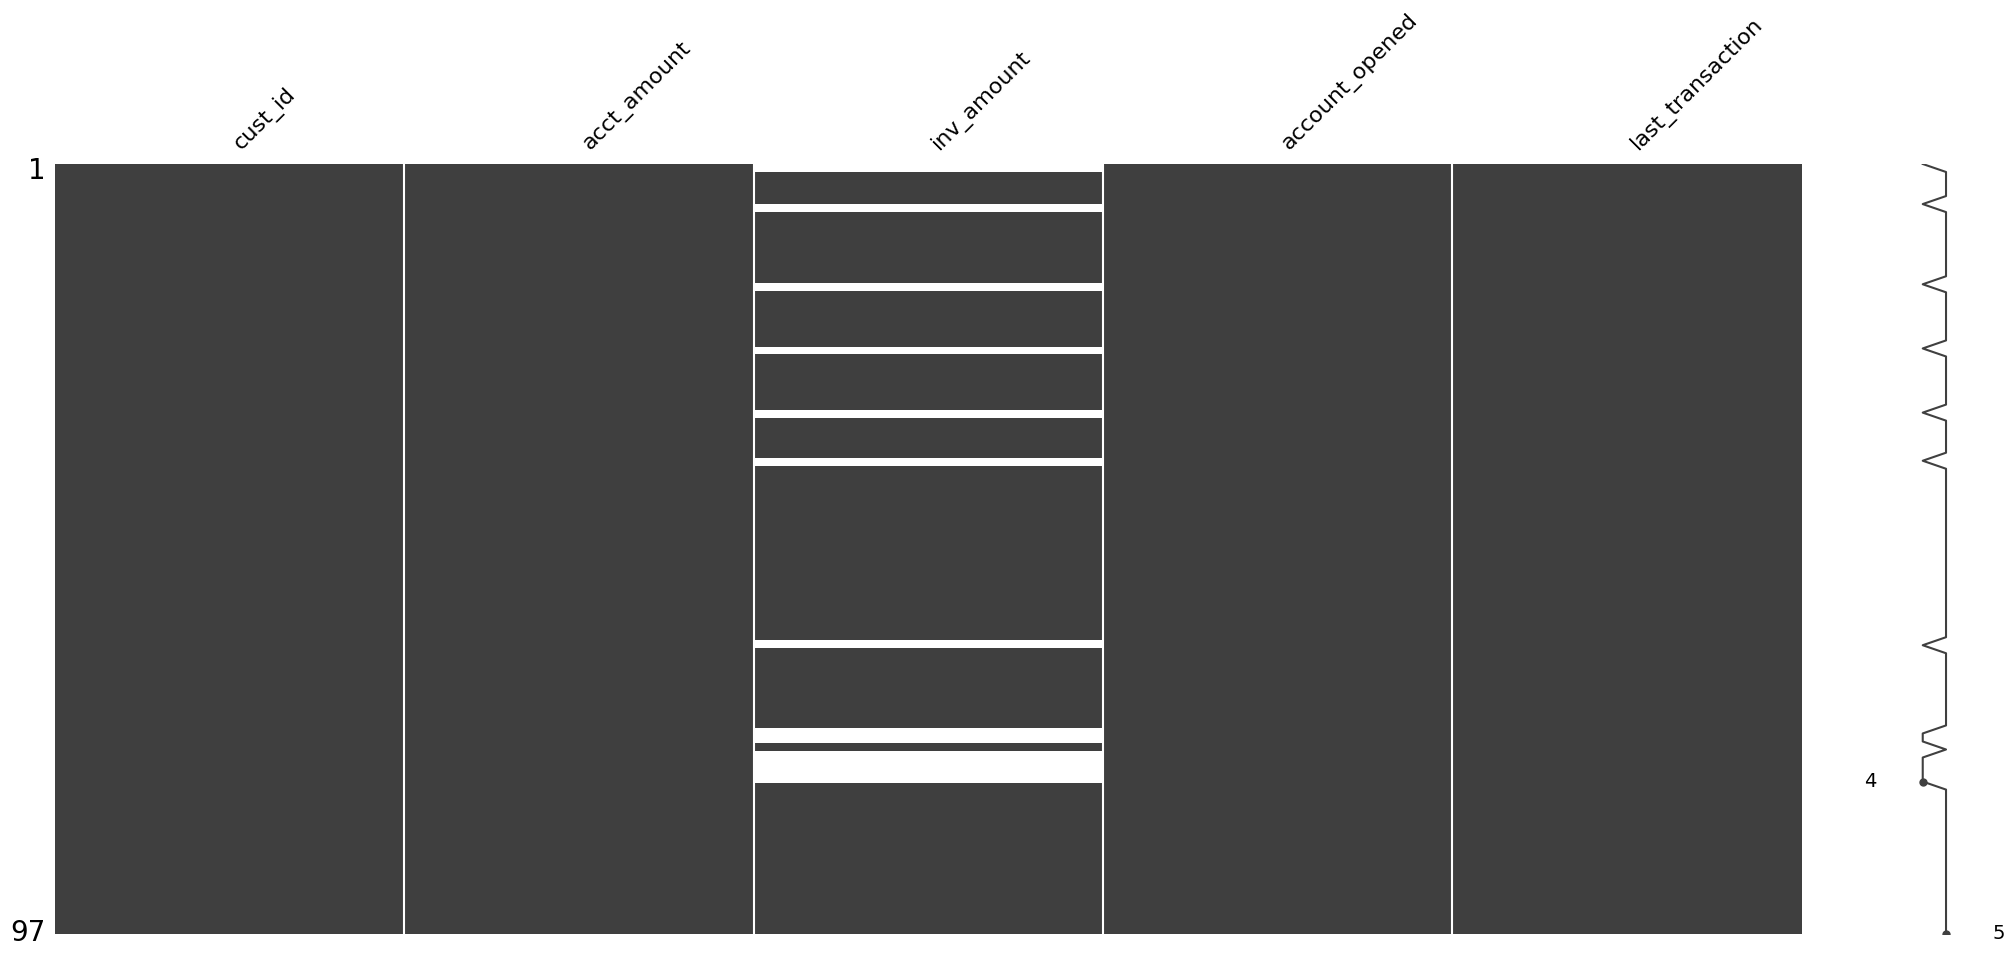

In [55]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()


- Isolate the values of __banking__ missing values of __inv_amount__ into __missing_investors__ and with non-missing __inv_amount__ values into __investors__

cust_id              0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


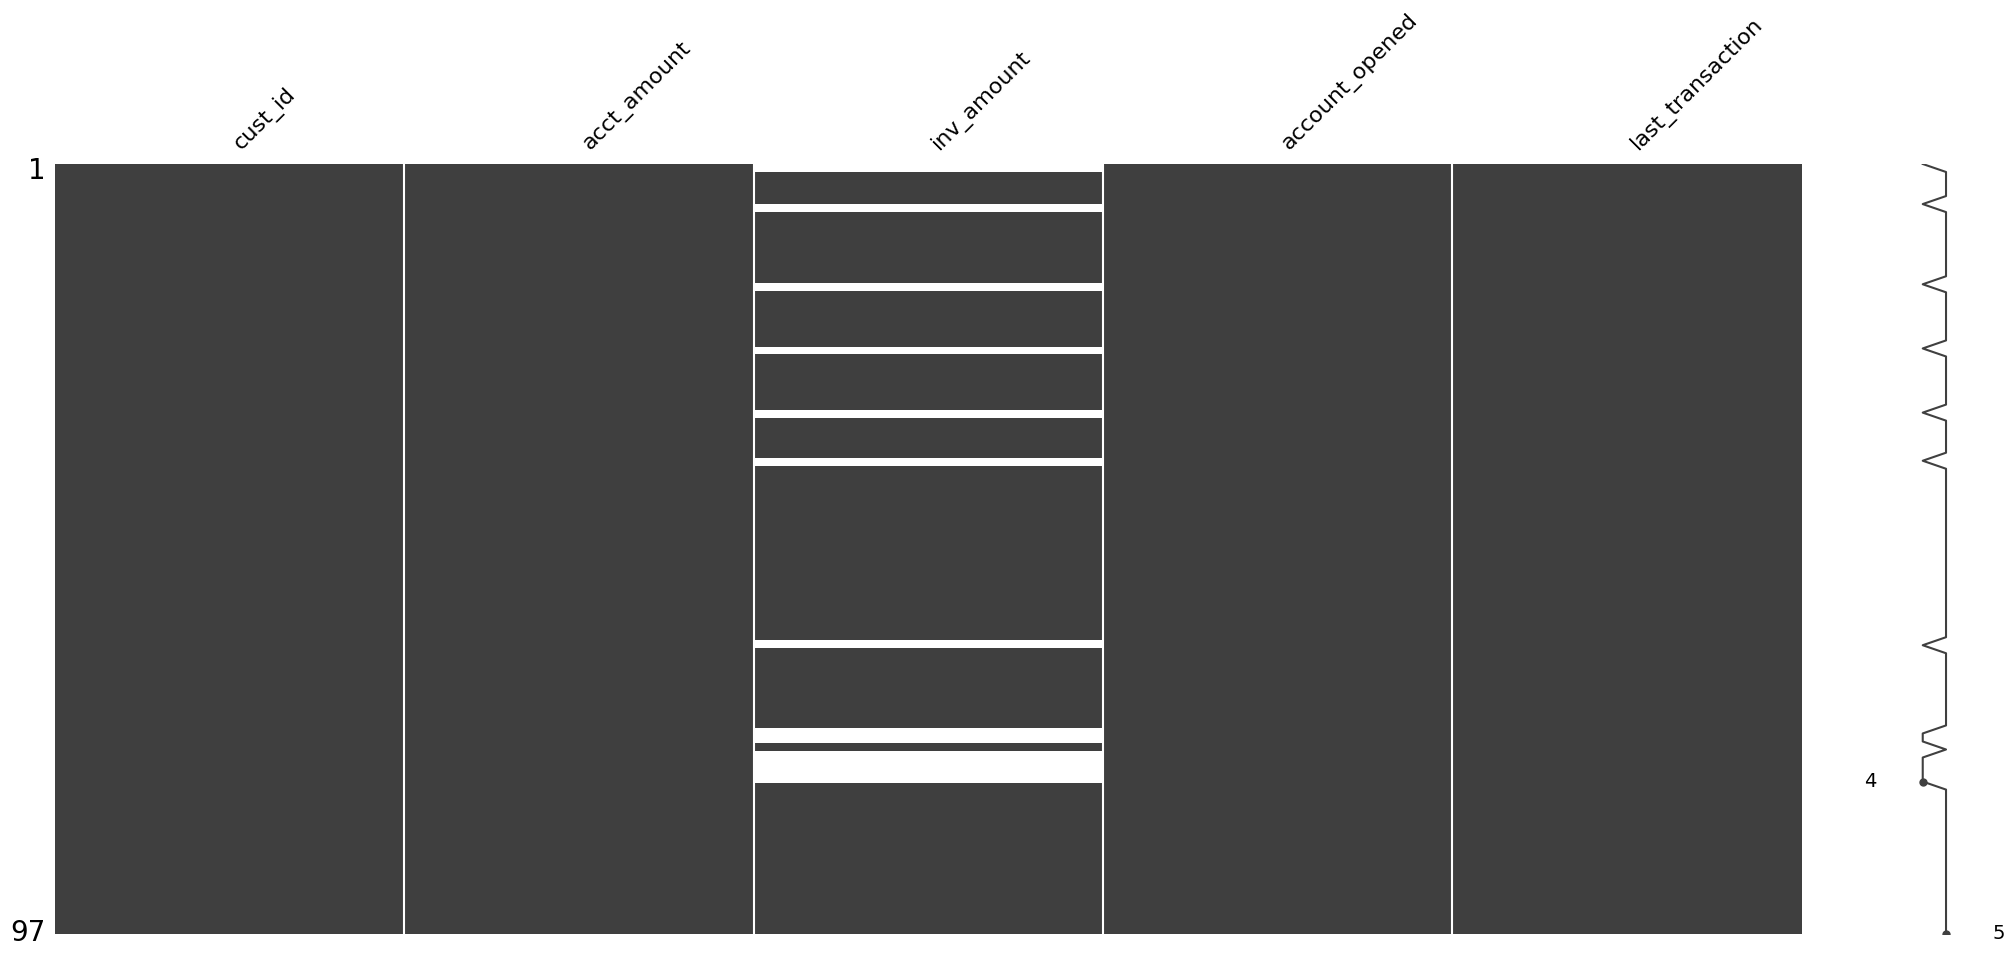

In [56]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

#### `Question`
Now that you've isolated __banking__ into __investors__ and __missing_investors__, use the __.describe()__ method on both of these DataFrames to understand whether there are structural differences between them. What do you think is going on?


In [64]:
x = 0
for _ in age:
  x += 1

print(x)

100


In [70]:
while len(age) > 97:
  age.pop()

# age

In [73]:
banking['age'] = age
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           97 non-null     object        
 1   acct_amount       97 non-null     float64       
 2   inv_amount        84 non-null     float64       
 3   account_opened    97 non-null     datetime64[ns]
 4   last_transaction  97 non-null     object        
 5   age               97 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.7+ KB


In [57]:
investors.describe()

,acct_amount,inv_amount,account_opened
count,8.400000e+01,84.000000,84
mean,1.526681e+06,44906.154762,2018-03-31 09:25:42.857142784
min,1.220984e+04,3214.000000,2017-02-07 00:00:00
25%,5.923468e+04,21932.000000,2017-10-13 18:00:00
50%,8.690974e+04,45785.500000,2018-05-06 12:00:00
75%,9.528552e+04,65120.500000,2018-09-11 18:00:00
max,1.206753e+08,94608.000000,2019-09-02 00:00:00
std,1.315740e+07,26426.516464,NaN


In [58]:
missing_investors.describe()

,acct_amount,inv_amount,account_opened
count,1.300000e+01,0.0,13
mean,1.343237e+07,NaN,2018-06-14 01:50:46.153846272
min,3.173019e+04,NaN,2017-07-11 00:00:00
25%,5.967801e+04,NaN,2018-03-05 00:00:00
50%,8.312765e+04,NaN,2018-04-28 00:00:00
75%,9.919398e+04,NaN,2018-10-08 00:00:00
max,1.737431e+08,NaN,2019-03-01 00:00:00
std,4.816739e+07,NaN,NaN


#### `Possible answers`


- The data is missing completely at random and there are no drivers behind the missingness.

- `The __inv_amount__ is missing only for young customers, since the average age in __missing_investors__ is ___22___ and the maximum age is ___25___.`

- The __inv_amount__ is missing only for old customers, since the average age in __missing_investors__ is ___42___ and the maximum age is ___59___.

- Sort the __banking__ DataFrame by the __age__ column and plot the missingness matrix of __banking_sorted__.

cust_id              0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
age                  0
dtype: int64


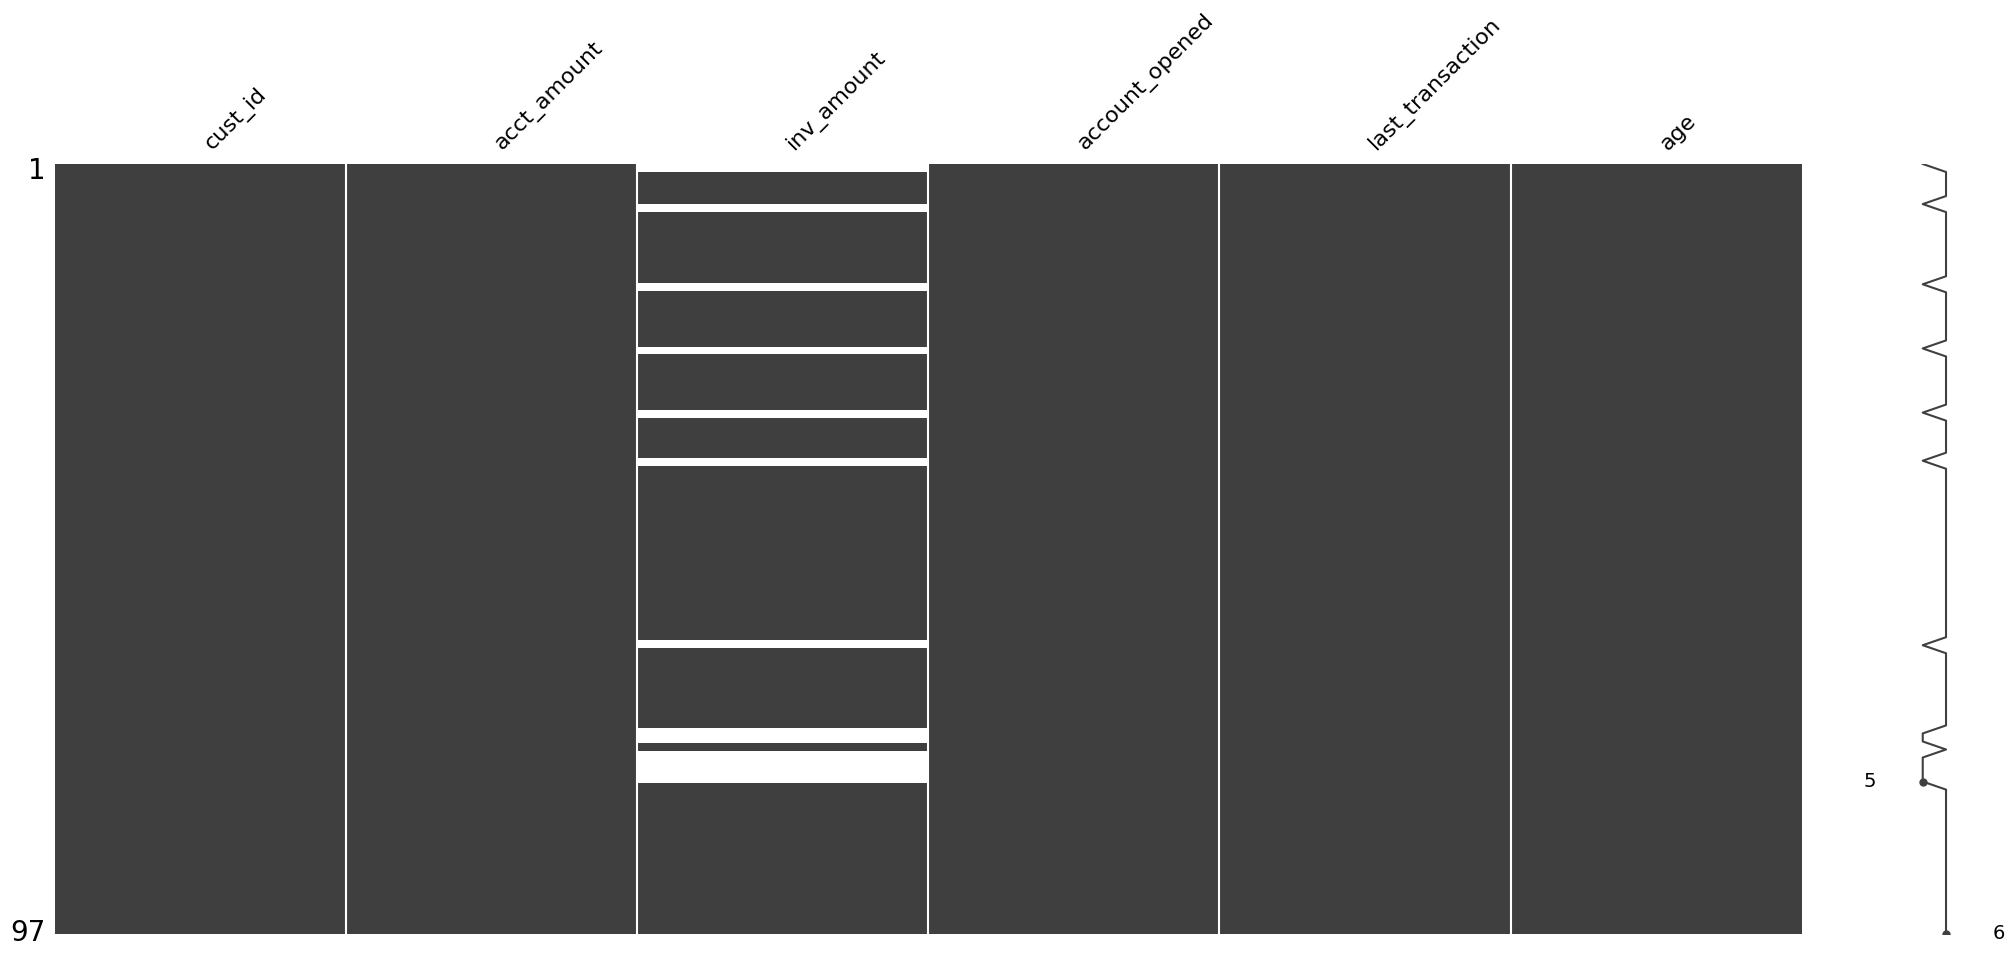

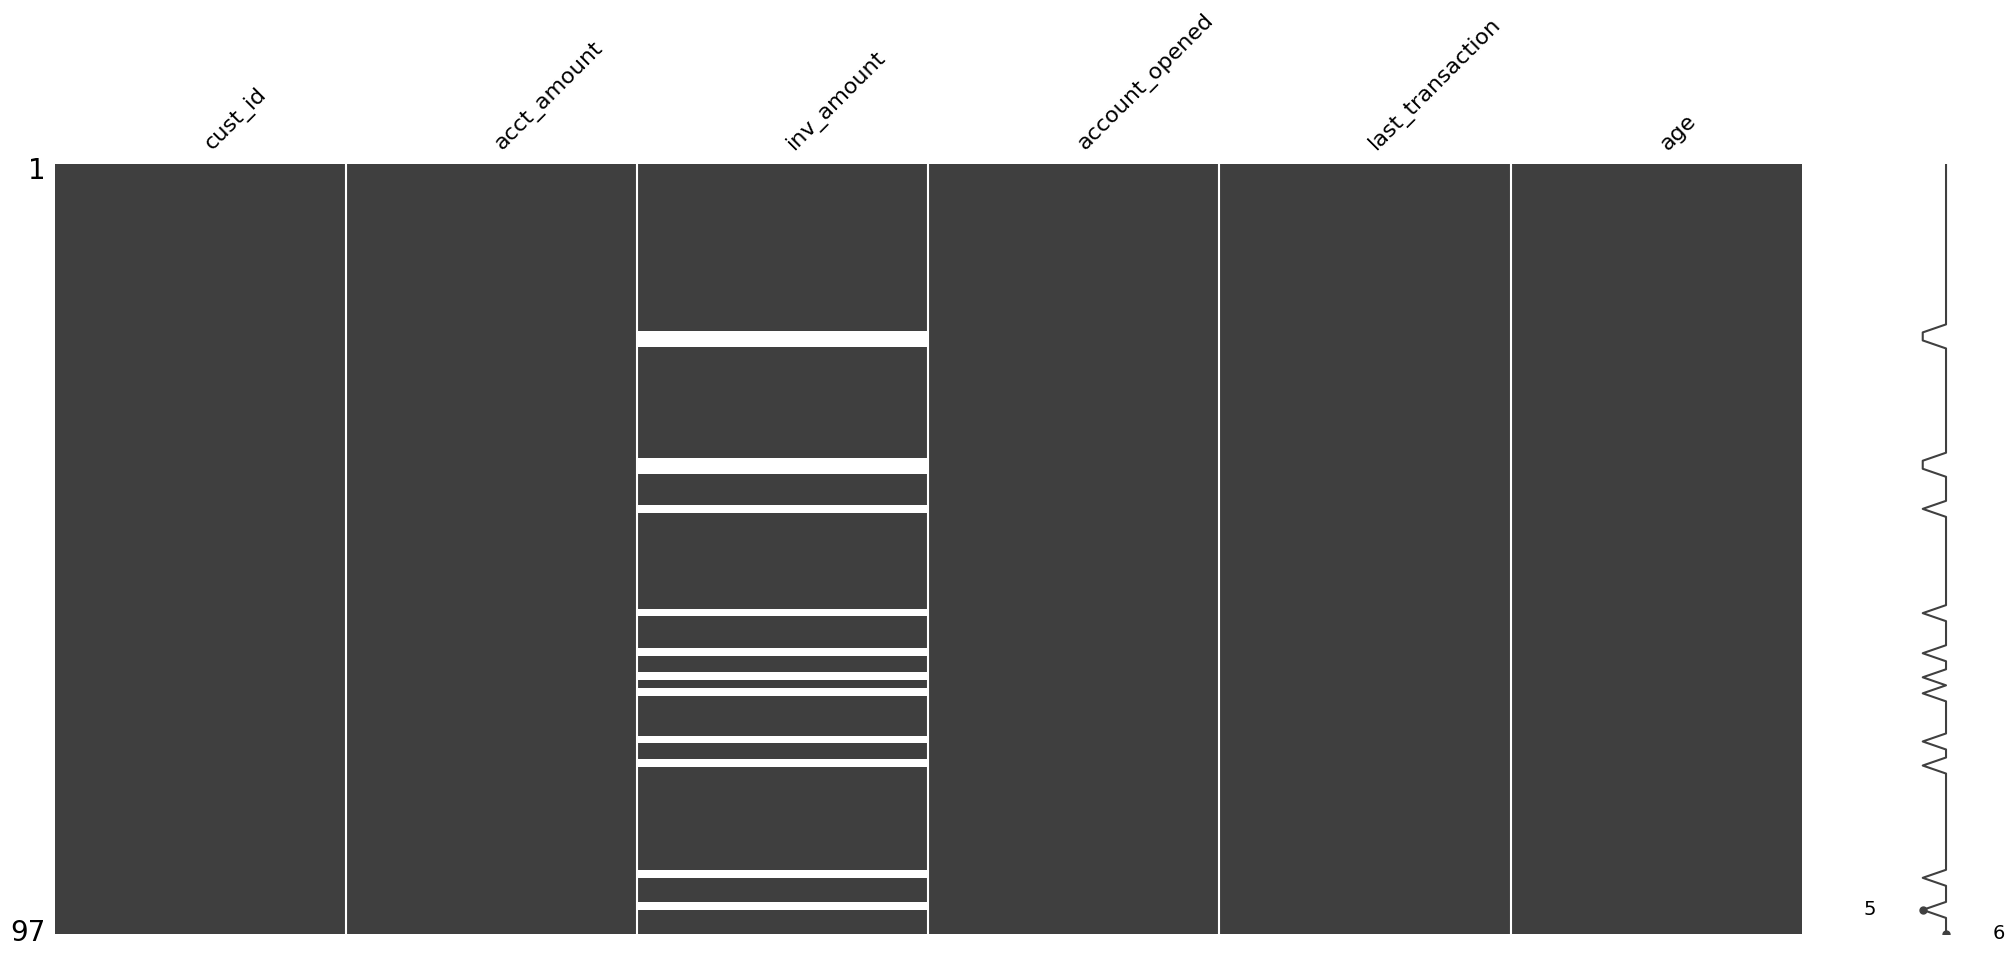

In [74]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

#### `Follow the money`
In this exercise, you're working with another version of the __banking__ DataFrame that contains missing values for both the __cust_id__scolumn and the __acct_amount__ column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing __cust_id__ s don't really help you, and that on average __acct_amount__ is usually 5 times the amount of __inv_amount__.

In this exercise, you will drop rows of __banking__ with missing __cust_id__ s, and impute missing values of __acct_amount__ with some domain knowledge.

Notice how all the white spaces for __inv_amount__ are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to ___0___ with __.fillna()__.

In [75]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset=['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount': acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())


print(banking.info())##

cust_id              0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
age                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cust_id           97 non-null     object        
 1   acct_amount       97 non-null     float64       
 2   inv_amount        84 non-null     float64       
 3   account_opened    97 non-null     datetime64[ns]
 4   last_transaction  97 non-null     object        
 5   age               97 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.7+ KB
None


- As you can see no missing data left, you can definitely _bank_ on getting your analysis right!

- Identifying missing data using the __isna()__ method, which checks for missing values in a DataFrame.
- Visualizing missing data with the __missingno__ package to understand the distribution of missing values across columns.
- Differentiating between types of missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR). Each type has implications for how you should handle the missing data.
- Practical strategies for dealing with missing data, including dropping missing values with __.dropna()__ and imputing missing values using statistical measures or domain knowledge with __.fillna()__.

For example, to drop rows with missing customer IDs and impute missing account amounts based on investment amounts, you used:

_`Drop missing values of cust_id`_

___banking_fullid = banking.dropna(subset=['cust_id'])___

_`Compute estimated acct_amount`_

___acct_imp = banking_fullid['inv_amount'] * 5___

_`Impute missing acct_amount with corresponding acct_imp`_

___banking_imputed = banking_fullid.fillna({'acct_amount': acct_imp})___
___This approach helps clean the data for more accurate analysis by addressing missing values effectively.___